In [1]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
alpha = 0.5
beta = 0.7
v = 14080
tau = 1.0
Cmin = 4
Cmax = 9
mesh_size = 25
num_sims = 4
risks_mean_dict = {}
risks_std_dict = {}
for d in [300,400,600,800,1200,1600,3200,4800,6400,9600,12800]:
    mean_file = 'results/risks_mean_alpha={},beta={},tau={},v={},d={},gamma=0.1,B=1,Cmin={},Cmax={},mesh_size={},num_sims={}.npy'.format(
        alpha,beta,tau,v,d,Cmin,Cmax,mesh_size,num_sims)
    std_file = 'results/risks_std_alpha={},beta={},tau={},v={},d={},gamma=0.1,B=1,Cmin={},Cmax={},mesh_size={},num_sims={}.npy'.format(
        alpha,beta,tau,v,d,Cmin,Cmax,mesh_size,num_sims)
    risks_mean_dict[d] = np.load(mean_file)
    risks_std_dict[d] = np.load(std_file)

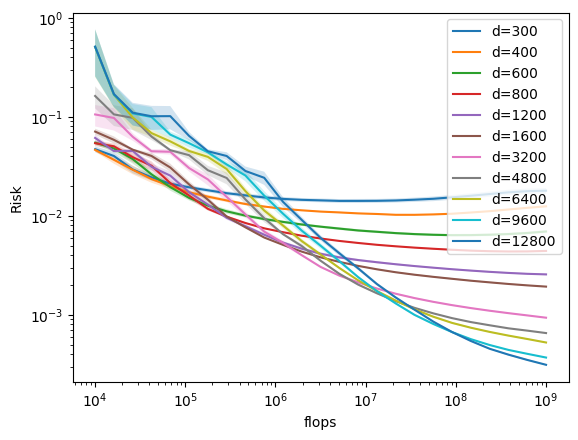

In [3]:
flops = np.logspace(Cmin,Cmax,mesh_size)
for d in risks_mean_dict.keys():
    mean = risks_mean_dict[d]
    stderr = risks_std_dict[d]
    plt.plot(flops,mean,label="d={}".format(d))
    plt.fill_between(flops,mean-stderr,mean+stderr,alpha=0.2)
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.xlabel("flops")
    plt.ylabel("Risk")